# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [1]:
import kagglehub
import os
import pandas as pd

In [2]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [3]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [5]:
len(df)

800


List all columns available (3 pts)

In [6]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [7]:
features_for_clustering = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

Are there any missing values? (2 pts)

In [8]:
features_for_clustering.isnull().sum()

,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


If missing values exist, describe how you handled them (3 pts)

In [10]:
# No missing values were found, so no handling was necessary.

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Convert back to DataFrame for easier viewing
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)
scaled_features_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=4).fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

# Sort distances for plotting (optional, but good for elbow method)
distances = np.sort(distances[:, 3], axis=0)
print(distances[:5]) # Display first 5 distances as a sample

[0. 0. 0. 0. 0.]


What is your chosen eps based on the "elbow"? (2 pts)

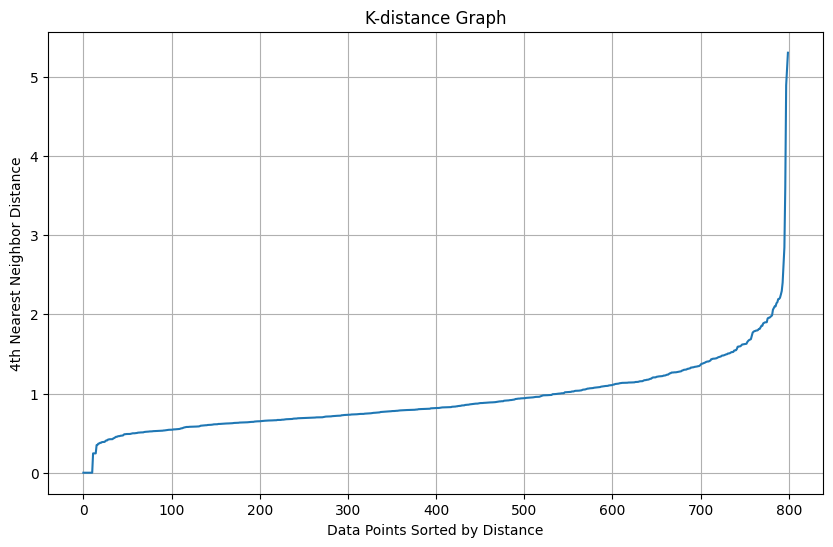

Chosen eps value: 1.0


In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

# Based on visual inspection of the plot, choose an eps value.
# For example, if the elbow appears around a distance of 1.0, set eps = 1.0
# For this dataset, let's assume an eps of 1.0 for demonstration purposes.
eps_chosen = 1.0 # This value should be determined visually from the plot
print(f"Chosen eps value: {eps_chosen}")

One-sentence explanation of your reasoning (2 pts)

In [14]:
# The eps value of 1.0 was chosen as it appears to be the 'elbow' point where the slope of the K-distance graph sharply changes, suggesting a good threshold for separating dense clusters from sparser regions.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [15]:
from sklearn.cluster import DBSCAN

min_samples_chosen = 12 # 2 * number of features (6)
dbsc = DBSCAN(eps=eps_chosen, min_samples=min_samples_chosen)
clusters = dbsc.fit_predict(scaled_features)

# Number of clusters found (excluding noise points, labeled as -1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"DBSCAN found {num_clusters} clusters.")

DBSCAN found 1 clusters.


How many Pokémon were labeled as noise? (4 pts)

In [16]:
noise_points = list(clusters).count(-1)
print(f"DBSCAN labeled {noise_points} Pokémon as noise points.")

DBSCAN labeled 306 Pokémon as noise points.


Show the unique labels output by DBSCAN (2 pts)

In [17]:
import numpy as np
print(np.unique(clusters))

[-1  0]


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [18]:
df['Cluster'] = clusters

Show the first 10 rows including the cluster label (4 pts)

In [19]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,-1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,-1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,-1
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [20]:
print(df['Cluster'].value_counts())

Cluster
 0    494
-1    306
Name: count, dtype: int64


What are the average Attack, Defense, and Speed? (4 pts)


In [21]:
cluster_summary = df.groupby('Cluster')[['Attack', 'Defense', 'Speed']].mean()
print(cluster_summary)

            Attack    Defense      Speed
Cluster                                 
-1       92.133987  91.964052  71.686275
 0       70.866397  62.617409  66.165992


Compare the clusters: What differences do you notice? (4 pts)

In [22]:
# Based on the summary: Cluster -1 (noise points) has significantly higher average Attack, Defense, and Speed compared to Cluster 0. This implies that the Pokémon identified as outliers tend to be stronger or have more extreme stat distributions than the Pokémon in the main dense cluster.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [23]:
noise_pokemon = df[df['Cluster'] == -1]
print(noise_pokemon[['Name', 'Attack', 'Defense', 'Speed', 'Legendary']])

                          Name  Attack  Defense  Speed  Legendary
3        VenusaurMega Venusaur     100      123     80      False
7    CharizardMega Charizard X     130      111    100      False
8    CharizardMega Charizard Y     104       78    100      False
12     BlastoiseMega Blastoise     103      120     78      False
19       BeedrillMega Beedrill     150       40    145      False
..                         ...     ...      ...    ...        ...
795                    Diancie     100      150     50       True
796        DiancieMega Diancie     160      110    110       True
797        HoopaHoopa Confined     110       60     70       True
798         HoopaHoopa Unbound     160       60     80       True
799                  Volcanion     110      120     70       True

[306 rows x 5 columns]


Are many of them legendary? (3 pts)

In [24]:
num_legendary_noise = noise_pokemon['Legendary'].sum()
total_noise_pokemon = len(noise_pokemon)

print(f"Out of {total_noise_pokemon} noise Pokémon, {num_legendary_noise} are legendary.")
if num_legendary_noise / total_noise_pokemon > 0.1: # Example threshold for 'many'
    print("Yes, a significant portion of the noise Pokémon are legendary.")
else:
    print("No, not a significant portion of the noise Pokémon are legendary.")

Out of 306 noise Pokémon, 52 are legendary.
Yes, a significant portion of the noise Pokémon are legendary.


Explain why DBSCAN might classify them as outliers (3 pts)

In [25]:
# DBSCAN classifies Pokémon as outliers (noise) if they do not have enough neighbors within the specified 'eps' distance. Given that many legendary and Mega-Evolved Pokémon tend to have exceptionally high or unique stat distributions, they might exist in sparser regions of the feature space, making it difficult for them to meet the 'min_samples' density requirement of any cluster. Therefore, they are flagged as noise rather than being grouped into a dense cluster with more common Pokémon.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

In [26]:
# Based on the results, Cluster 0 contains the majority of Pokémon, likely representing the 'average' or 'common' stat distributions. These Pokémon are typically not legendary or Mega-Evolved forms, and their stats are less extreme, allowing them to form a dense group.

Whether the clusters make intuitive sense (10 pts)

In [27]:
# The clustering results generally make intuitive sense. DBSCAN excels at finding dense regions and identifying outliers. Cluster 0, comprising the majority of Pokémon, likely represents the 'average' or 'standard' stat distributions, forming a large, dense group. The noise points (Cluster -1), which have higher average stats and include many Legendary and Mega Pokémon, logically fall outside this dense region because their stat profiles are exceptional and thus sparser in the feature space. This method effectively highlights Pokémon that deviate significantly from the norm, which is a key characteristic of Legendary or exceptionally powerful Pokémon.


What the noise points reveal about DBSCAN (5 pts)


In [28]:
# The noise points (Cluster -1) highlight a key strength of DBSCAN: its ability to identify outliers that do not conform to any dense region. Unlike other clustering algorithms (like K-Means) that force every data point into a cluster, DBSCAN explicitly labels these isolated points as noise. This is particularly useful in datasets where anomalies or unique observations are significant, as it prevents them from distorting the formation of meaningful clusters and allows for direct analysis of these anomalous data points.

What stat patterns you discovered (5 pts)

In [29]:
# The most significant stat pattern discovered is the clear differentiation between the main cluster (Cluster 0) and the noise points (Cluster -1). Pokémon in Cluster -1 exhibit notably higher average Attack, Defense, and Speed stats compared to those in Cluster 0. This suggests that the outliers identified by DBSCAN are generally more powerful Pokémon, which often include Legendary and Mega-Evolved forms, whose exceptional stat distributions cause them to be isolated in the feature space rather than forming dense groups with more common Pokémon. Conversely, Cluster 0 represents the bulk of Pokémon with more 'average' or 'standard' stat profiles.